In [11]:
import numpy as np
import cv2
import os
import pandas as pd
import math
from hmmlearn import hmm
import matplotlib.pyplot as plt
import array as arr
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
data = []
def get_images():
    for j in range(0,10):
        for i in range(1, 61):
            image = cv2.imread("./" + str(j) + "/img (" + str(i) + ").jpg",0)
            (thresh, im_bw) = cv2.threshold(image, 128, 1, cv2.THRESH_BINARY )
            a = np.array(im_bw)
            data.append(a.flatten())
    return data

In [12]:
Vect = get_images()

model_DT = tree.DecisionTreeClassifier()
model_RF = RandomForestClassifier()


In [13]:
v = [[j for i in range(1,61)] for j in range(0,10)] 
model_DT.fit(Vect, np.ravel(v))
model_RF.fit(Vect, np.ravel(v))

RandomForestClassifier()

In [14]:
#tree.plot_tree(model_DT)
print("le taux d'apprentissage de l'arbre de decision : "+str(model_DT.score( Vect,np.ravel(v))*100)+"%")
print("le taux d'apprentissage de la Random forest : "+str(model_RF.score( Vect,np.ravel(v))*100)+"%")

le taux d'apprentissage de l'arbre de decision : 100.0%
le taux d'apprentissage de la Random forest : 100.0%


In [15]:
image = cv2.imread("./testSample/F_t_6 (8).jpg",0)
(thresh, im_bw) = cv2.threshold(image, 128, 1, cv2.THRESH_BINARY )
a = np.array(im_bw)
data.append([a.flatten()])


In [16]:
predictionDT = model_DT.predict([a.flatten()])
predictionFT = model_RF.predict([a.flatten()])

In [17]:
print(predictionDT)
print(predictionFT)


[6]
[6]


In [18]:
import glob
test_X=[]
test_Y=[]
for imagePath in glob.glob("./testSample"+"/*.jpg"):
    image = cv2.imread(imagePath,0)
    (thresh, im_bw) = cv2.threshold(image, 128, 1, cv2.THRESH_BINARY )
    a = np.array(im_bw)
    test_X.append(a.flatten())
    test_Y.append(int(imagePath[17:19]))

In [19]:
print("le taux de test pour DecisionTreeClassifier est egal a : "+str(model_DT.score( test_X,test_Y )*100)+"%")
print("le taux de test pour RandomForestClassifier est egal a : " + str(model_RF.score( test_X,test_Y )*100)+"%")

le taux de test pour DecisionTreeClassifier est egal a : 63.0%
le taux de test pour RandomForestClassifier est egal a : 83.66666666666667%


AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

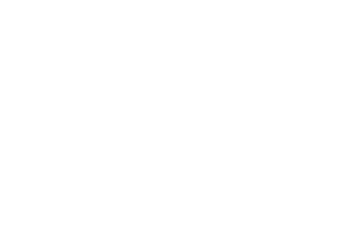

In [22]:
tree.plot_tree(model_DT);